## Task 1 - Prediction Using Supervised ML 

**INTERNSHIP :** The Sparks Foundation

**BATCH :** February 2021

**NAME :** S.SANJEEV

**TOPIC :** Prediction Using Supervised ML

**TABLE OF CONTENTS :**
    1. Insights on the Data
    2. Model Building & Predictions
    3. Model Performance Evaluation

**1. Insights on the Data -**

In [102]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("student_scores.csv")

In [104]:
print(f"Shape of DataFrame : {df.shape}")

print(f"Top 5 Records - \n")
df.head()

Shape of DataFrame : (25, 2)
Top 5 Records - 



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [105]:
print(f"Bottom 5 Records - \n")
df.tail()

Bottom 5 Records - 



,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**INFERENCES & FURTHER APPROACHES :**
- We have only 25 records & 2 features to deal with & make our prediction , which is acceptable & basic enough to start off.
- We will observe our Datatype, Description reports & also check for existence of null values if any

In [106]:
print("Datatype Report - \n")
df.dtypes

Datatype Report - 



Hours     float64
Scores      int64
dtype: object

In [107]:
print(f"Description Report - \n")
df.describe()

Description Report - 



,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [108]:
print(f"Null-Value Report - \n")
df.isnull().sum()

Null-Value Report - 



Hours     0
Scores    0
dtype: int64

**INFERENCES & FURTHER APPROACHES :**
- It is very clear that both 'Hours' & 'Scores' are numerical features
- The average 'Hours' studied is around 5 hours & the average 'Scores' obtained is around 51. The maximum score obtained till date is at 95 with an effort equal to 9.2 hours of study. All these quantities will be made even more clear once we plot the distribution behaviour of these two variables
- No null values are observed in the data so we need not worry about dealing with it & proceed further for our analysis
- We will look at the data points & observe their distribution behaviour

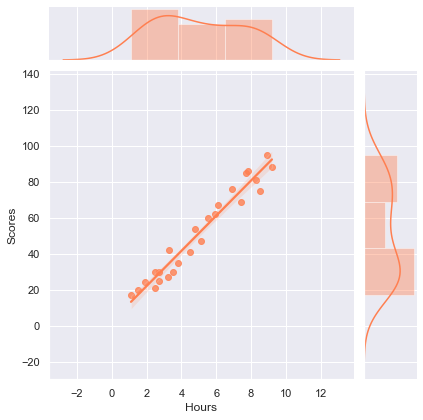

In [109]:
sns.set(style = "darkgrid")
sns.jointplot("Hours", "Scores", data = df, kind = "reg",color = "coral")

**INFERENCES & FURTHER APPROACHES :**
- The trend of 'Hours' Vs 'Scores' is increasing & we see that the feature distribution doesn't have any outliers and can be approximated to a Gaussian distribution
- We have added a linear regression fit line and can conclude that it has done good enough with the data points
- Next up we will train-test split the data, make predictions and evaluate our model 

**2. Model Building & Predictions -**

In [110]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [111]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, Y_train) 

LinearRegression()

In [112]:
Y_pred = model.predict(X_test) 
data = pd.DataFrame({"Actual Value": Y_test, "Predicted Value": Y_pred})  
print(data)

   Actual Value  Predicted Value
0            81        83.188141
1            30        27.032088
2            21        27.032088
3            76        69.633232
4            62        59.951153


In [113]:
hours = 9.25
prediction = model.predict([[hours]])
print(f"Number of Hours = {hours}")
print(f"Predicted Score = {prediction[0]}")

Number of Hours = 9.25
Predicted Score = 92.38611528261494


**INFERENCES & FURTHER APPROACHES :**
- Train - Test split was performed with 20% data allocated for testing
- Basic Linear Regression model is implemented & predictions were done both with the existing test data & our own data
- The model has predicted a score of around 92 for number of hours of study equal to 9.25
- We will evaluate the performance of our model with an evaluation metric

**3. Model Performance Evaluation -**

In [114]:
from sklearn import metrics  
print('Mean Absolute Error (MAE):',metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error (MAE): 3.9207511902099244


**FINAL WORDS :** For simplicity of the data I have chosen the evaluation metric of MAE. Obivously prediction using only a single feature will not yield us great results but it is always good to observe how efficient the predictions are.